In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [2]:
print(df.shape)

(545, 13)


In [3]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [4]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [6]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


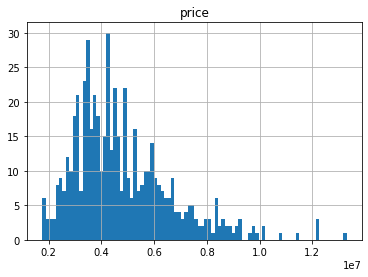

In [7]:
df['price'].hist(bins=90)
plt.title('price')
plt.show()

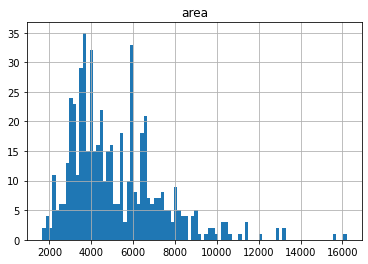

In [8]:
df['area'].hist(bins=90)
plt.title('area')
plt.show()

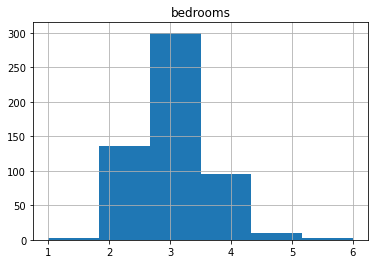

In [9]:
df['bedrooms'].hist(bins=6)
plt.title('bedrooms')
plt.show()

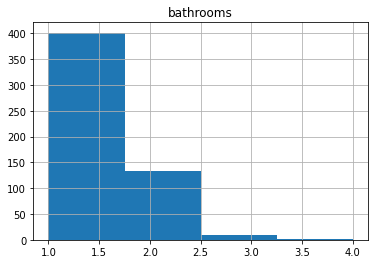

In [10]:
df['bathrooms'].hist(bins=4)
plt.title('bathrooms')
plt.show()

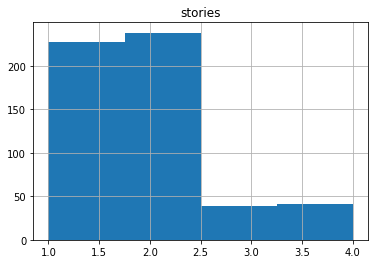

In [11]:
df['stories'].hist(bins=4)
plt.title('stories')
plt.show()

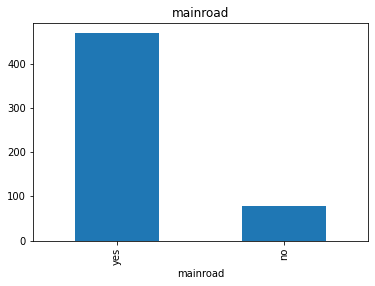

In [12]:
df['mainroad'].value_counts().plot(kind='bar')
plt.title('mainroad')
plt.show()

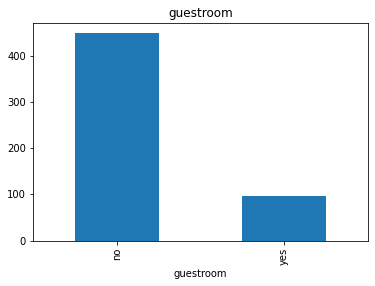

In [13]:
df['guestroom'].value_counts().plot(kind='bar')
plt.title('guestroom')
plt.show()

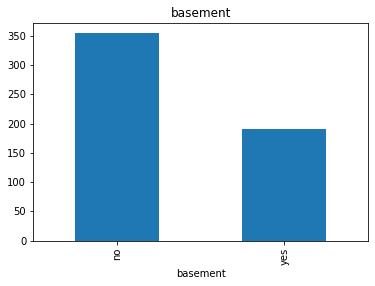

In [14]:
df['basement'].value_counts().plot(kind='bar')
plt.title('basement')
plt.show()

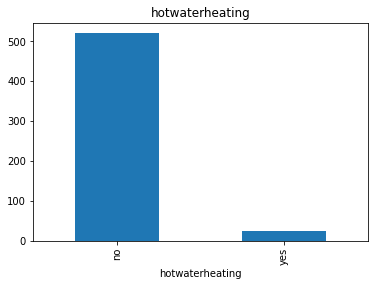

In [15]:
df['hotwaterheating'].value_counts().plot(kind='bar')
plt.title('hotwaterheating')
plt.show()

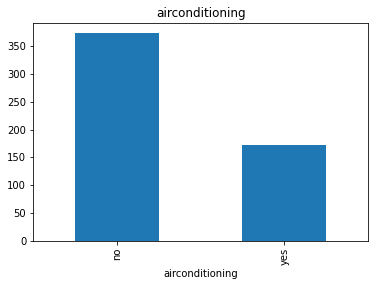

In [16]:
df['airconditioning'].value_counts().plot(kind='bar')
plt.title('airconditioning')
plt.show()

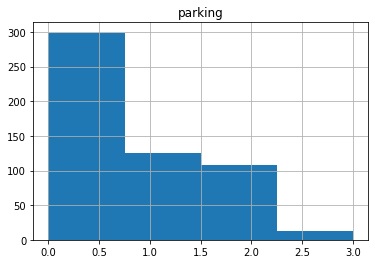

In [17]:
df['parking'].hist(bins=4)
plt.title('parking')
plt.show()

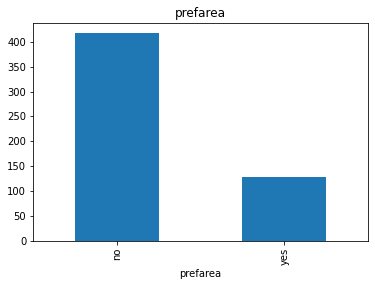

In [18]:
df['prefarea'].value_counts().plot(kind='bar')
plt.title('prefarea')
plt.show()

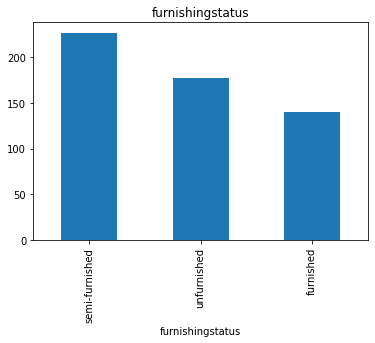

In [19]:
df['furnishingstatus'].value_counts().plot(kind='bar')
plt.title('furnishingstatus')
plt.show()

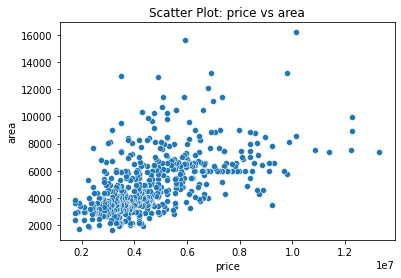

In [20]:
sns.scatterplot(x='price', y='area', data=df)
plt.title('Scatter Plot: price vs area')
plt.show()

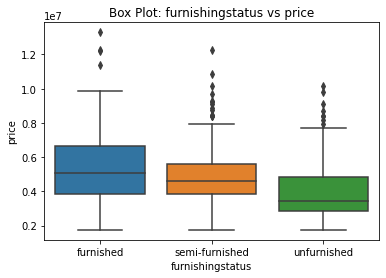

In [21]:
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Box Plot: furnishingstatus vs price')
plt.show()

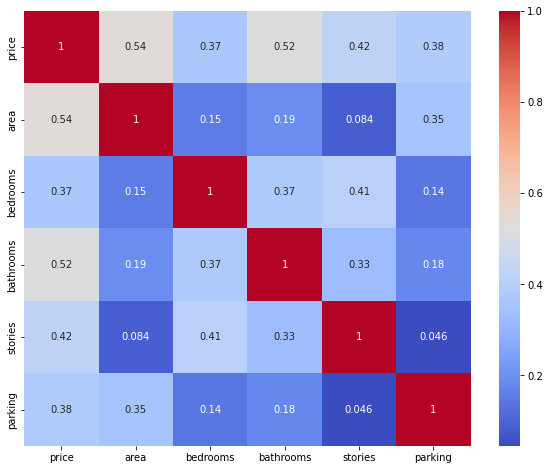

In [26]:
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()